<a href="https://colab.research.google.com/github/ardilalukita14/Magang-Kominfo/blob/main/Mining_Merge_Keyword.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Install Library yang Dibutuhkan**

In [1]:
!pip install GoogleNews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 288 kB 4.2 MB/s 
     |████████████████████████████████| 749 kB 53.4 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2022.6.2
    Uninstalling regex-2022.6.2:
      Successfully uninstalled regex-2022.6.2


In [7]:
!pip install pygooglenews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!pip install newspaper3k

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached newspaper3k-0.2.8-py3-none-any.whl (211 kB)
  Using cached feedfinder2-0.0.4.tar.gz (3.3 kB)
  Using cached tinysegmenter-0.3-py3-none-any.whl
  Using cached cssselect-1.1.0-py2.py3-none-any.whl (16 kB)
  Using cached tldextract-3.3.1-py3-none-any.whl (93 kB)
  Using cached jieba3k-0.35.1.zip (7.4 MB)
  Using cached requests_file-1.5.1-py2.py3-none-any.whl (3.7 kB)
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3357 sha256=f67579d6fb6cfefce67a822425deb228bc545eefe3c0cc80d3cf4fe3ba6d28d5
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcdab5e6d84a21c10346
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398404 sha256=7f946daeac0deceddbd5330bf45e9e854a5a406c2e0c03feae0d0e250247cf6b
  Stored in directory: /root/.cache/pip/wheels/4c/91/46/3c208287b726df325a5979574324878b679116e4b

In [10]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Proses Scraping, Stemming, Stop Words Google News**

In [11]:
# import library 
from pygooglenews import GoogleNews
import csv
from newspaper import Article
import nltk
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
nltk.download('punkt')
from pprint import pprint
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import datetime
import pandas as pd
from time import sleep
#from google.colab import files


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [13]:
f = open("stop words.txt", "r")
stopword_list = []
for line in f:
    stripped_line = line.strip()
    line_list = stripped_line.split()
    stopword_list.append(line_list[0])
f.close()

len(stopword_list)

758

In [14]:

# Scrapping Function to get google news (title, link)
gn = GoogleNews(lang = 'id',country = 'ID') 
def get_titles(search):
    stories = []

    # setting tanggal
    start_date = datetime.date(2022,7,1)
    end_date = datetime.date(2022,7,16)
    delta = datetime.timedelta(days=1)
    date_list = pd.date_range(start_date, end_date).tolist()
    
    for date in date_list[:-1]:
        result = gn.search(search, from_=date.strftime('%Y-%m-%d'), to_=(date+delta).strftime('%Y-%m-%d'), when = '1d')
        newsitem = result['entries']
   # stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    for item in newsitem:
        url=item.link
        try:
            article = Article(url)
            article.download()
            article.parse()
            story = {
                'Title' : item.title,
                'Read more' : item.link,
                'Time' : item.published,
                'Article' : article.title,
                'Stemming' : stemmer.stem(article.title),
                'WordTokens' :(word_tokenize(stemmer.stem(article.title))),
                'WordsStop' : [w for w in (word_tokenize(stemmer.stem(article.title))) if not w in stopword_list ],
                'TotalKata' : len([w for w in (word_tokenize(stemmer.stem(article.title))) if not w in stopword_list ])
                }
            if article.title=="Are you a robot?" or article.title=="Subscribe to read" :
                continue
            else:
                stories.append(story)
                i=i+1
                print(i,'',article.title)
                sleep(1)
        except:
              pass
        stories.append(story)
        sleep(0)
    return stories


In [15]:
# Process Summarize Goolge News Article + Sentiment Analysis of Google News
def summarize_artcle(url):
    article = Article(url)
    # Set up 
    article.download()
    article.parse()
    # Download Punkt
    article.download('punkt')
    article.nlp()
    summary = article.summary

    analysis = TextBlob(article.text)
    sentiment_a =""
    if analysis.polarity > 0:
      sentiment_a="positif"
    elif analysis.polarity < 0:
      sentiment_a="negatif"
    else:
       sentiment_a="netral"

    return summary,sentiment_a

In [29]:
#Function to save a list
def save_dict(topic, number):
    try: 
      dcts = get_titles(topic)
      news_list = []
      for x in range(number):
        dctss = dcts[x]
        url = dctss['Read more']
        try:
          summary_analysis = list(summarize_artcle(url))
          dctss['Sentiment'] = summary_analysis[1]
          dctss['Summary'] = summary_analysis[0]
        except:
          dctss['Sentiment'] = 'error'
          dctss['Summary'] ='error'
        news_list.append(dctss)
        pprint(dctss)
      return news_list 
    except:
        print('Please input useable topics, thanks or check this -> https://github.com/kotartemiy/pygooglenews#installation')

In [32]:
#Function to Save a CSV file
def save_to_csv(news_list):
    labels = ['Time', 'Title', 'Read more','Sentiment','Summary', 'Article', 'Stemming', 'WordTokens', 'WordsStop', 'TotalKata']
    try:
        with open(file, 'w') as f:
            writer = csv.DictWriter(f, fieldnames=labels)
            writer.writeheader()
            for elem in news_list:
                writer.writerow(elem)
        print("Download csv Sucessfully")
    except IOError:
        print("I/O error")
file = input('Rename file: ')

Rename file: jakarta.csv


In [33]:
# Let's run this    
print("Hi, there!")
topic = input('Now Enter your topics to Search or Exit: ')
while topic != 'Exit':
  number = int(input('How many articles you want to search (up to 100)? '))
  news_data = save_dict(topic, number)
  try:
    save_to_csv(news_data)
    #save_to_csv2(news_data)
  except:
    print("Retry it again!")
  topic = input('Now Enter Your Topics to Search or Exit: ')
print('See you, hope you have a great day! ❤️')

Hi, there!
Now Enter your topics to Search or Exit: jakarta
How many articles you want to search (up to 100)? 50
{'Article': 'Hari Ini, 500 Buruh Akan Unjuk Rasa di Balai Kota DKI Jakarta '
            'Halaman all',
 'Read more': 'https://megapolitan.kompas.com/read/2022/07/20/06353181/hari-ini-500-buruh-akan-unjuk-rasa-di-balai-kota-dki-jakarta?page=all',
 'Sentiment': 'netral',
 'Stemming': 'hari ini 500 buruh akan unjuk rasa di balai kota dki jakarta '
             'halaman all',
 'Summary': '',
 'Time': 'Tue, 19 Jul 2022 23:35:00 GMT',
 'Title': 'Hari Ini, 500 Buruh Akan Unjuk Rasa di Balai Kota DKI Jakarta - '
          'Kompas.com - Megapolitan Kompas.com',
 'TotalKata': 9,
 'WordTokens': ['hari',
                'ini',
                '500',
                'buruh',
                'akan',
                'unjuk',
                'rasa',
                'di',
                'balai',
                'kota',
                'dki',
                'jakarta',
                'hala

## **Join Dataset**

In [34]:
d1 = pd.read_csv(input('masukkan nama file 1 : '))
d2 = pd.read_csv(input('masukkan nama file 2 : '))
d3 = pd.read_csv(input('masukkan nama file 3 : '))
d4 = pd.read_csv(input('masukkan nama file 4 : '))
d5 = pd.read_csv(input('masukkan nama file 5 : '))
frames = [d1, d2, d3, d4, d5] 
result = pd.concat(frames).drop_duplicates().reset_index(drop=True)

masukkan nama file 1 : surabaya.csv
masukkan nama file 2 : malang.csv
masukkan nama file 3 : jakarta.csv
masukkan nama file 4 : madiun.csv
masukkan nama file 5 : magetan.csv


In [35]:
result.to_csv(r'join.csv', index=False)

In [36]:
df2 = input("Upload file CSV: ")
df3 = pd.read_csv(df2)
df3

Upload file CSV: join.csv


,Time,Title,Read more,Sentiment,Summary,Article,Stemming,WordTokens,WordsStop,TotalKata
0,"Tue, 19 Jul 2022 11:35:19 GMT","5 Alasan Surabaya Cocok Jadi Tempat Kuliah, Ba...",https://www.detik.com/jatim/berita/d-6187745/5...,negatif,"Nah, apa saja sih, yang menjadikan Kota Suraba...","5 Alasan Surabaya Cocok Jadi Tempat Kuliah, Ba...",5 alas surabaya cocok jadi tempat kuliah banya...,"['5', 'alas', 'surabaya', 'cocok', 'jadi', 'te...","['5', 'alas', 'surabaya', 'cocok', 'kuliah', '...",8
1,"Wed, 20 Jul 2022 03:34:36 GMT",Aksi Heboh Pria Surabaya Bikin Jalan Tunjungan...,https://www.detik.com/jatim/berita/d-6188470/a...,negatif,Sebuah video fashion walk di Jalan Tunjungan S...,Aksi Heboh Pria Surabaya Bikin Jalan Tunjungan...,aksi heboh pria surabaya bikin jalan tunjung b...,"['aksi', 'heboh', 'pria', 'surabaya', 'bikin',...","['aksi', 'heboh', 'pria', 'surabaya', 'bikin',...",11
2,"Wed, 20 Jul 2022 03:50:00 GMT","Tragis, Tabrakan Maut di Surabaya, Balita Tewa...",https://www.kesatu.co/news/pr-2473928793/tragi...,netral,KESATU.CO - Kecelakaan maut kali ini terjadi d...,"Tragis, Tabrakan Maut di Surabaya, Balita Tewa...",tragis tabrak maut di surabaya balita tewas da...,"['tragis', 'tabrak', 'maut', 'di', 'surabaya',...","['tragis', 'tabrak', 'maut', 'surabaya', 'bali...",9
3,"Tue, 19 Jul 2022 22:00:00 GMT","Warga Surabaya, Merokok di 7 Lokasi ini Bisa K...",https://jatim.liputan6.com/read/5018361/warga-...,netral,"Yakni, sarana kesehatan, tempat proses belajar...","Warga Surabaya, Merokok di 7 Lokasi ini Bisa K...",warga surabaya rokok di 7 lokasi ini bisa kena...,"['warga', 'surabaya', 'rokok', 'di', '7', 'lok...","['warga', 'surabaya', 'rokok', '7', 'lokasi', ...",9
4,"Wed, 20 Jul 2022 04:00:22 GMT",Eri Cahyadi Bakal Libatkan Warga Surabaya dala...,https://surabaya.liputan6.com/read/5018478/eri...,netral,"Liputan6.com, Surabaya - Untuk meningkatkan ra...",Eri Cahyadi Bakal Libatkan Warga Surabaya dala...,eri cahyadi bakal libat warga surabaya dalam t...,"['eri', 'cahyadi', 'bakal', 'libat', 'warga', ...","['eri', 'cahyadi', 'libat', 'warga', 'surabaya...",8
...,...,...,...,...,...,...,...,...,...,...
114,"Wed, 20 Jul 2022 01:57:55 GMT",2 Link Nonton Live Streaming Aston Villa vs Br...,https://magetan.pikiran-rakyat.com/olahraga/pr...,positif,"PortalMagetan.com - Akses di artikel ini, link...",2 Link Nonton Live Streaming Aston Villa vs Br...,2 link nonton live streaming aston villa vs br...,"['2', 'link', 'nonton', 'live', 'streaming', '...","['2', 'link', 'nonton', 'live', 'streaming', '...",14
115,"Wed, 20 Jul 2022 04:31:29 GMT","Friendly Match Orlando City vs Arsenal, Jadwal...",https://magetan.pikiran-rakyat.com/olahraga/pr...,positif,PortalMagetan.com - Simak ulasan preview perta...,"Friendly Match Orlando City vs Arsenal, Jadwal...",friendly match orlando city vs arsenal jadwal ...,"['friendly', 'match', 'orlando', 'city', 'vs',...","['friendly', 'match', 'orlando', 'city', 'vs',...",14
116,"Tue, 19 Jul 2022 13:00:04 GMT",TNI AU Bentuk Tim Penyelidikan Insiden Pesawat...,https://m.liputan6.com/jateng/read/5018089/tni...,positif,"Liputan6.com, Jakarta - TNI AU membentuk tim P...",TNI AU Bentuk Tim Penyelidikan Insiden Pesawat...,tni au bentuk tim lidi insiden pesawat jatuh d...,"['tni', 'au', 'bentuk', 'tim', 'lidi', 'inside...","['tni', 'au', 'bentuk', 'tim', 'lidi', 'inside...",9
117,"Tue, 19 Jul 2022 11:41:00 GMT",Penyelidikan Penyebab Kecelakaan Pesawat Golde...,https://jatim.antaranews.com/foto/620585/penye...,netral,NaN,Penyelidikan Penyebab Kecelakaan Pesawat Golde...,lidi sebab celaka pesawat golden eagle,"['lidi', 'sebab', 'celaka', 'pesawat', 'golden...","['lidi', 'celaka', 'pesawat', 'golden', 'eagle']",5


Masukkan file: join.csv


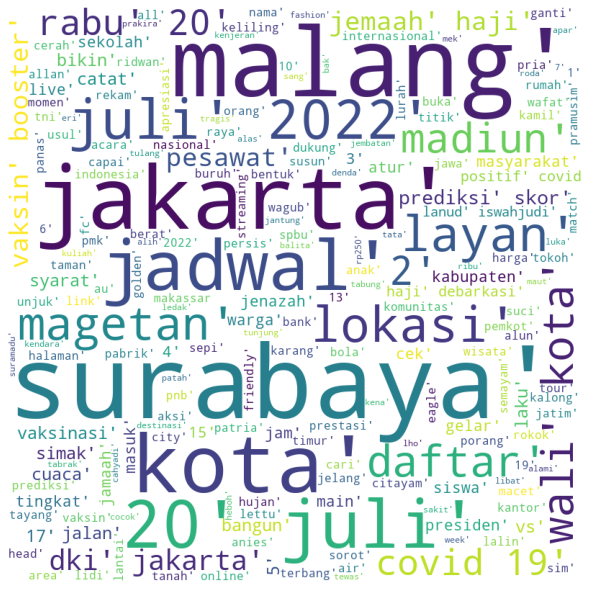

In [37]:
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
# Reads 'Youtube04-Eminem.csv' file
df = pd.read_csv((input('Masukkan file: ')), encoding ="latin-1")
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.WordsStop:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()